In [27]:
# Course : CS 513 - Knowledge Discovery and Data Mining
# Group Members: Branden Bulatao, Joseph Faustino, Natalie Fortes, Isabel Sutedjo
# Id : 20005971
# Purpose : Music Happiness Predictor - Predicts the happiness of music tracks based on various features.

# Main Author: Branden Bulatao

In [28]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [29]:
# Import dataset
df = pd.read_csv('./dataset.csv')

df.drop(df.columns[df.columns.str.contains('unnamed', case=False)], axis=1, inplace=True) # drop unnamed column
df.dropna(inplace=True) # drop rows with null values

df['valence'] = df['valence'].astype('category')
df['valence'] = df['valence'].map(lambda x: 0 if x < 0.5 else 1) # sets valence to 0 if sad, 1 if happy

# Convert 'explicit' boolean to integer (0/1)
df['explicit'] = df['explicit'].astype(int)

# One-hot encode categorical features
df = pd.get_dummies(df, columns=['key', 'time_signature', 'track_genre'], drop_first=True)

# Scalar
scalar = MinMaxScaler()

# X = df.drop(['track_id', 'artists', 'album_name', 'track_name', 'valence'], axis=1)
X = df.drop(['track_id', 'artists', 'album_name', 'track_name', 'valence'], axis=1)
y = df['valence']
X = pd.DataFrame(scalar.fit_transform(X), columns=X.columns)

# Train the code
attr_train, attr_test, target_train, target_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(df.head(1))

target_train.head()
# attr_train.head()
target_test.head()

                 track_id      artists album_name track_name  popularity  \
0  5SuOikwiRyPMVoIQDJUgSV  Gen Hoshino     Comedy     Comedy          73   

   duration_ms  explicit  danceability  energy  loudness  ...  \
0       230666         0         0.676   0.461    -6.746  ...   

   track_genre_spanish  track_genre_study  track_genre_swedish  \
0                False              False                False   

   track_genre_synth-pop  track_genre_tango  track_genre_techno  \
0                  False              False               False   

   track_genre_trance  track_genre_trip-hop  track_genre_turkish  \
0               False                 False                False   

   track_genre_world-music  
0                    False  

[1 rows x 145 columns]


113186    0
42819     0
59311     0
90417     0
61000     1
Name: valence, dtype: int64

In [30]:
# Train Naive Bayes model
model = GaussianNB()
model.fit(attr_train, target_train)

# Make Prediction
target_pred = model.predict(attr_test)

In [31]:
# Evaluate model
accuracy = accuracy_score(target_test, target_pred)
conf_matrix = confusion_matrix(target_test, target_pred)
class_report = classification_report(target_test, target_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.6902

Confusion Matrix:
 [[11972  6599]
 [ 3997 11632]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.64      0.69     18571
           1       0.64      0.74      0.69     15629

    accuracy                           0.69     34200
   macro avg       0.69      0.69      0.69     34200
weighted avg       0.70      0.69      0.69     34200



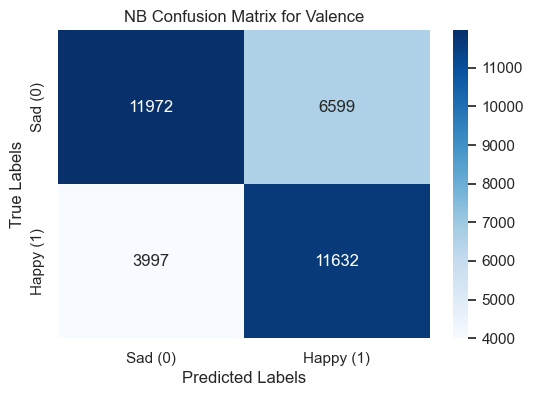

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(target_test, target_pred)

# Create the heatmap
plt.figure(figsize=(6, 4))
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt="g", cmap="Blues", ax=ax)

# Labels, title, and ticks
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_title("NB Confusion Matrix for Valence")
ax.xaxis.set_ticklabels(["Sad (0)", "Happy (1)"])
ax.yaxis.set_ticklabels(["Sad (0)", "Happy (1)"])

plt.show()

In [33]:
test_actual = attr_test  # Copy attr_test
test_actual["target_pred"] = target_pred  # Create new column for prediction values
test_actual["test_actual"] = target_test  # Create new column for actual values
# test_actual.head()  # Show table

false_positives = test_actual[
    (test_actual["target_pred"] == 1) & (test_actual["test_actual"] == 0)
]

false_negatives = test_actual[
    (test_actual["target_pred"] == 0) & (test_actual["test_actual"] == 1)
]

true_positives = test_actual[
    (test_actual["target_pred"] == 1) & (test_actual["test_actual"] == 1)
]

true_negatives = test_actual[
    (test_actual["target_pred"] == 0) & (test_actual["test_actual"] == 0)
]

print(false_positives)
print(false_negatives)
# false_positives.describe()

        popularity  duration_ms  explicit  danceability  energy  loudness  \
19261         0.00     0.023624       0.0      0.476142   0.183  0.631060   
115           0.60     0.041421       0.0      0.642640   0.299  0.771933   
88580         0.00     0.036664       0.0      0.797970   0.696  0.817343   
60735         0.19     0.009757       0.0      0.924873   0.616  0.685700   
3241          0.00     0.040957       0.0      0.422335   0.964  0.861291   
...            ...          ...       ...           ...     ...       ...   
84333         0.56     0.012589       0.0      0.662944   0.472  0.642473   
52481         0.13     0.033161       0.0      0.479188   0.181  0.660193   
103113        0.00     0.045181       0.0      0.646701   0.745  0.756969   
112151        0.48     0.053039       0.0      0.759391   0.646  0.765681   
53782         0.62     0.029978       1.0      0.697462   0.915  0.891349   

        mode  speechiness  acousticness  instrumentalness  ...  \
19261    

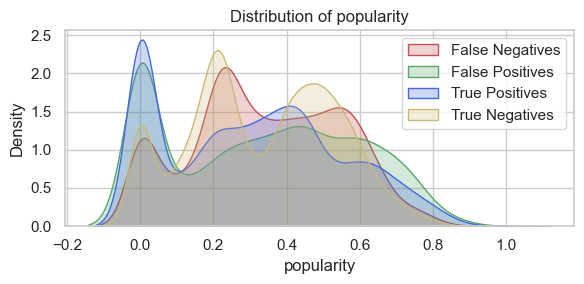

Stats for 'popularity':
  False Negatives - mean: 0.3428, std: 0.2022
  False Positives - mean: 0.3354, std: 0.2542
  True Positives  - mean: 0.3064, std: 0.2365
  True Negatives  - mean: 0.3322, std: 0.1986
------------------------------------------------------------


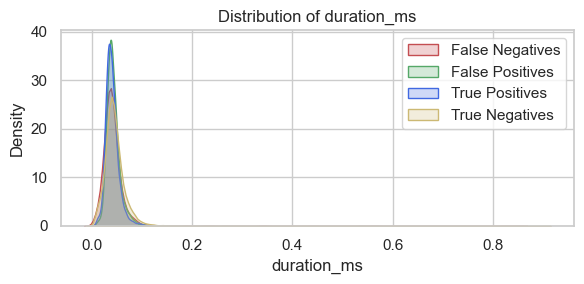

Stats for 'duration_ms':
  False Negatives - mean: 0.0415, std: 0.0334
  False Positives - mean: 0.0417, std: 0.0136
  True Positives  - mean: 0.0394, std: 0.0138
  True Negatives  - mean: 0.0450, std: 0.0253
------------------------------------------------------------


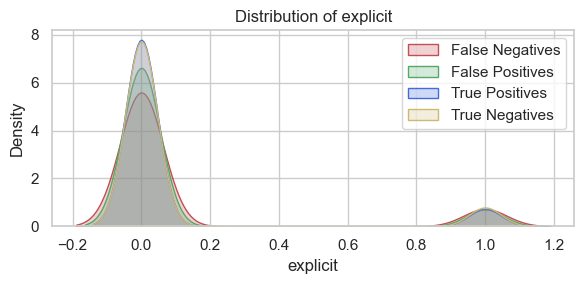

Stats for 'explicit':
  False Negatives - mean: 0.1138, std: 0.3177
  False Positives - mean: 0.0955, std: 0.2939
  True Positives  - mean: 0.0847, std: 0.2784
  True Negatives  - mean: 0.0918, std: 0.2888
------------------------------------------------------------


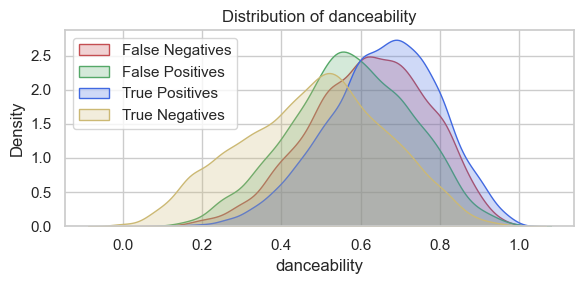

Stats for 'danceability':
  False Negatives - mean: 0.6195, std: 0.1496
  False Positives - mean: 0.5752, std: 0.1538
  True Positives  - mean: 0.6544, std: 0.1416
  True Negatives  - mean: 0.4825, std: 0.1815
------------------------------------------------------------


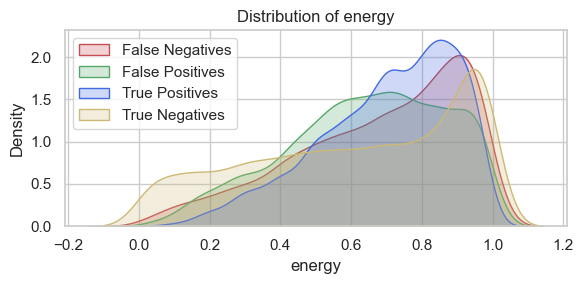

Stats for 'energy':
  False Negatives - mean: 0.6763, std: 0.2384
  False Positives - mean: 0.6409, std: 0.2242
  True Positives  - mean: 0.7007, std: 0.1935
  True Negatives  - mean: 0.6097, std: 0.2984
------------------------------------------------------------


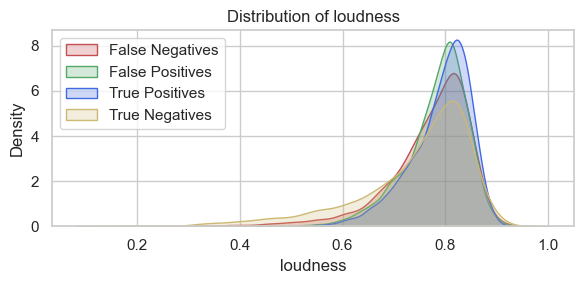

Stats for 'loudness':
  False Negatives - mean: 0.7685, std: 0.0826
  False Positives - mean: 0.7814, std: 0.0619
  True Positives  - mean: 0.7896, std: 0.0601
  True Negatives  - mean: 0.7404, std: 0.1157
------------------------------------------------------------


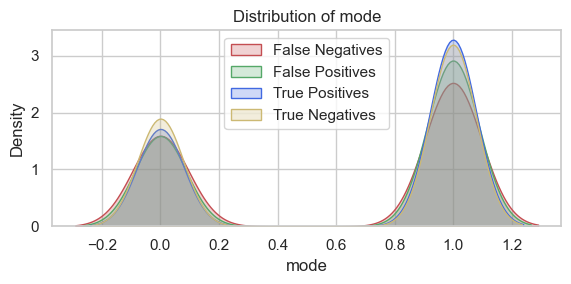

Stats for 'mode':
  False Negatives - mean: 0.6131, std: 0.4871
  False Positives - mean: 0.6474, std: 0.4778
  True Positives  - mean: 0.6572, std: 0.4747
  True Negatives  - mean: 0.6279, std: 0.4834
------------------------------------------------------------


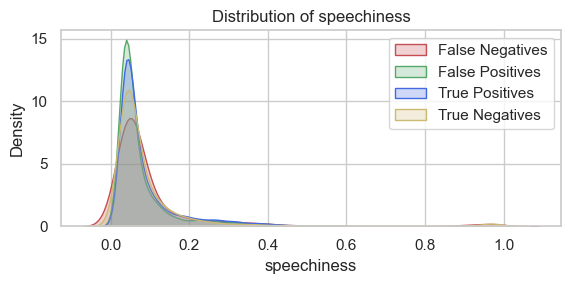

Stats for 'speechiness':
  False Negatives - mean: 0.1076, std: 0.1560
  False Positives - mean: 0.0781, std: 0.0830
  True Positives  - mean: 0.0889, std: 0.0927
  True Negatives  - mean: 0.0958, std: 0.1400
------------------------------------------------------------


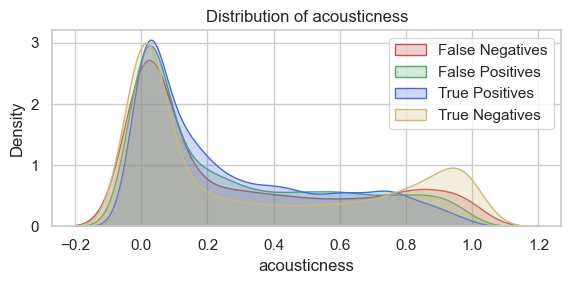

Stats for 'acousticness':
  False Negatives - mean: 0.2973, std: 0.3334
  False Positives - mean: 0.2803, std: 0.3028
  True Positives  - mean: 0.2686, std: 0.2780
  True Negatives  - mean: 0.3365, std: 0.3772
------------------------------------------------------------


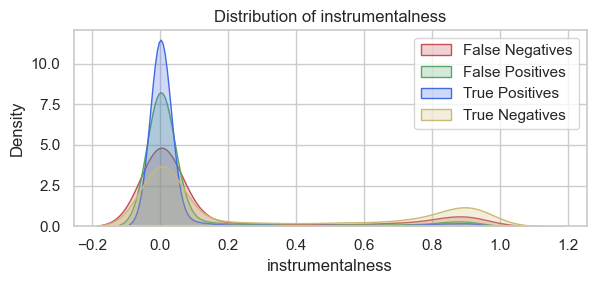

Stats for 'instrumentalness':
  False Negatives - mean: 0.1605, std: 0.3081
  False Positives - mean: 0.0788, std: 0.2192
  True Positives  - mean: 0.0538, std: 0.1811
  True Negatives  - mean: 0.2936, std: 0.3821
------------------------------------------------------------


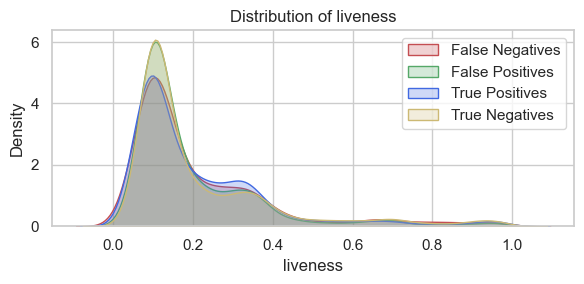

Stats for 'liveness':
  False Negatives - mean: 0.2126, std: 0.1864
  False Positives - mean: 0.1980, std: 0.1681
  True Positives  - mean: 0.2120, std: 0.1827
  True Negatives  - mean: 0.2153, std: 0.1910
------------------------------------------------------------


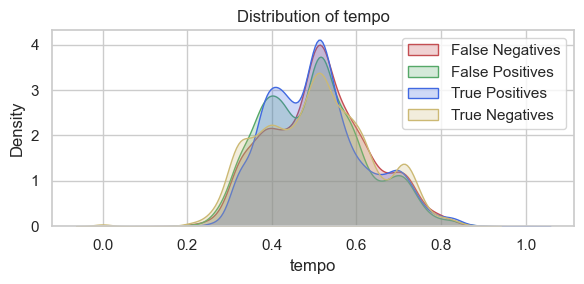

Stats for 'tempo':
  False Negatives - mean: 0.5122, std: 0.1187
  False Positives - mean: 0.4984, std: 0.1188
  True Positives  - mean: 0.5069, std: 0.1160
  True Negatives  - mean: 0.5048, std: 0.1294
------------------------------------------------------------


In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

df_no_genres = df.loc[:, ~df.columns.str.contains("track_genre")]

feature_cols = [
    col
    for col in df_no_genres.columns
    if col
    not in [
        "target_actual",
        "target_pred",
        "track_id",
        "artists",
        "album_name",
        "track_name",
        "valence",
    ]
]

KF_df = df.drop(columns="valence")
for col in df_no_genres.select_dtypes(include=["float", "int"]).columns:
    if col == "valence":
        continue
    plt.figure(figsize=(6, 3))
    sns.kdeplot(false_negatives[col], label="False Negatives", fill=True, color="r")
    sns.kdeplot(false_positives[col], label="False Positives", fill=True, color="g")
    sns.kdeplot(
        true_positives[col], label="True Positives", fill=True, color="royalblue"
    )
    sns.kdeplot(true_negatives[col], label="True Negatives", fill=True, color="y")
    plt.title(f"Distribution of {col}")
    plt.legend()
    plt.tight_layout()
    plt.show()

    print(f"Stats for '{col}':")
    print(
        f"  False Negatives - mean: {false_negatives[col].mean():.4f}, std: {false_negatives[col].std():.4f}"
    )
    print(
        f"  False Positives - mean: {false_positives[col].mean():.4f}, std: {false_positives[col].std():.4f}"
    )
    print(
        f"  True Positives  - mean: {true_positives[col].mean():.4f}, std: {true_positives[col].std():.4f}"
    )
    print(
        f"  True Negatives  - mean: {true_negatives[col].mean():.4f}, std: {true_negatives[col].std():.4f}"
    )
    print("-" * 60)

['popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'tempo', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11', 'time_signature_1', 'time_signature_3', 'time_signature_4', 'time_signature_5']


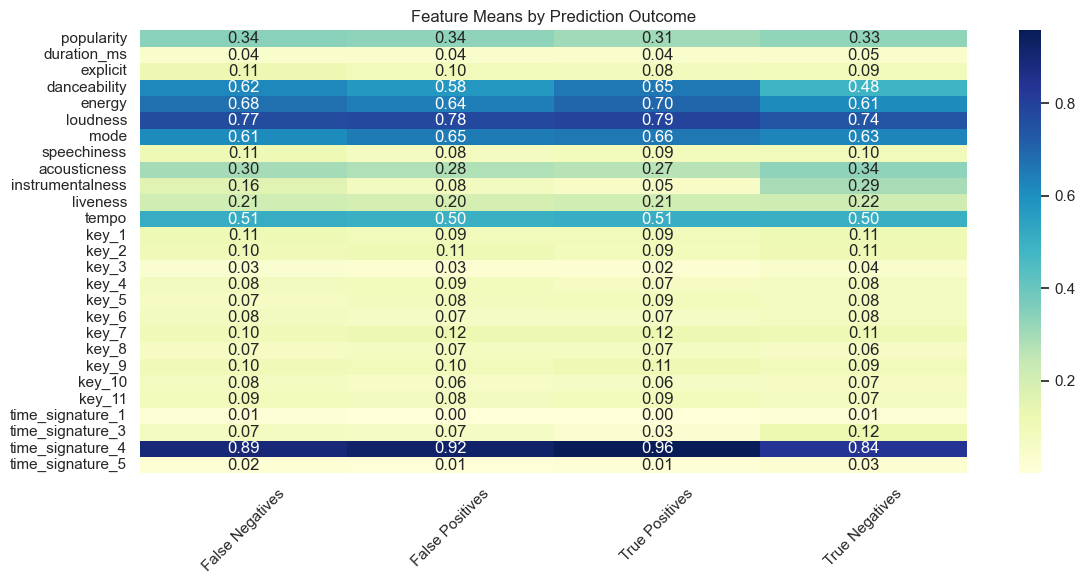

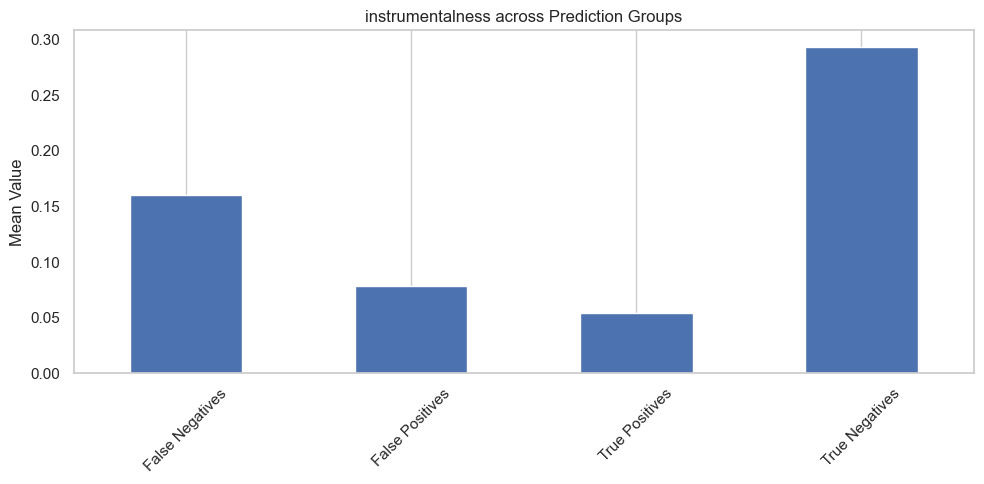

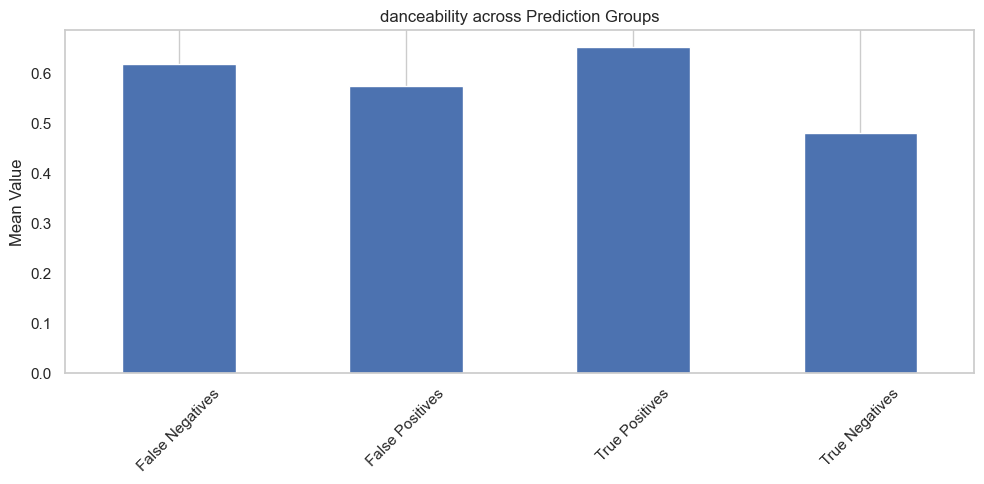

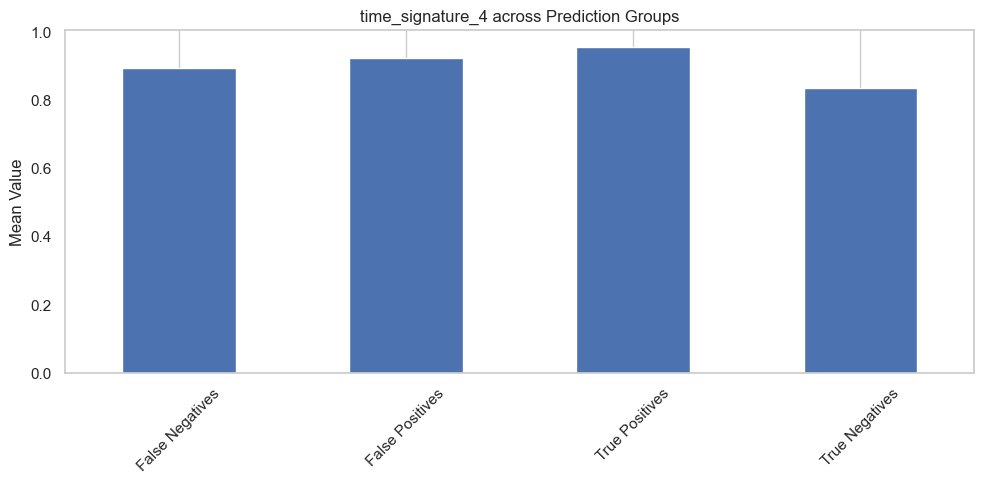

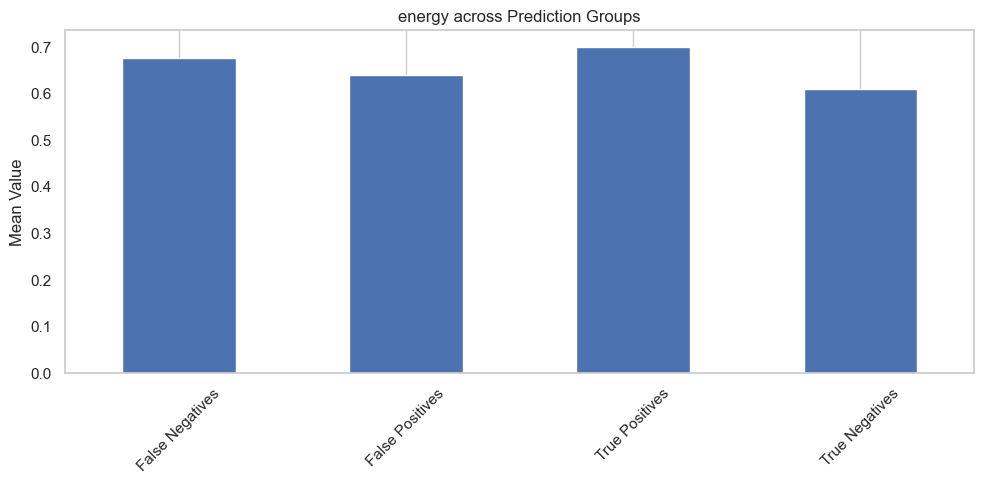

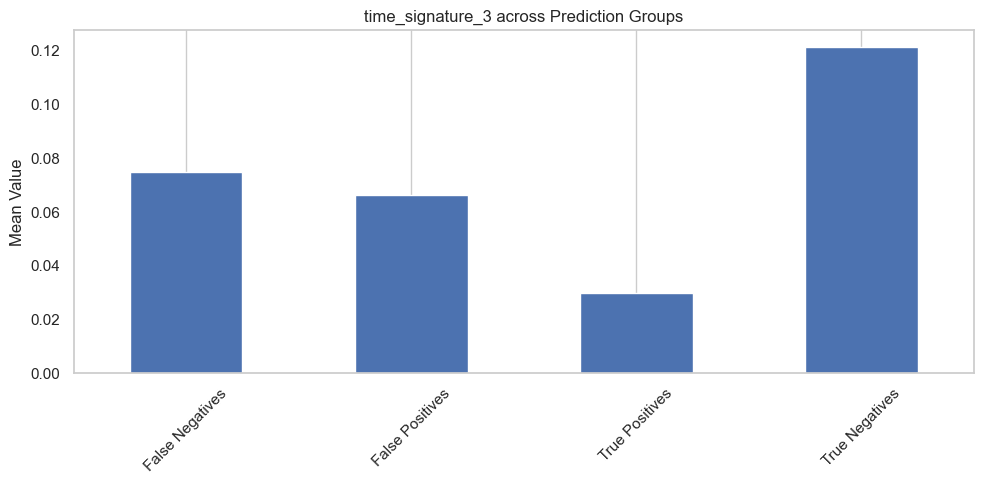

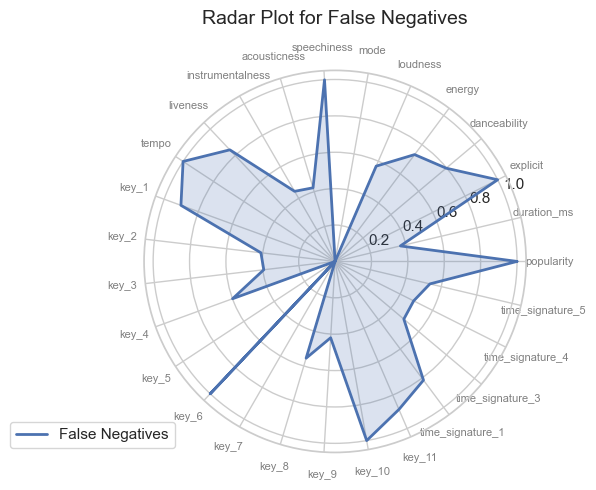

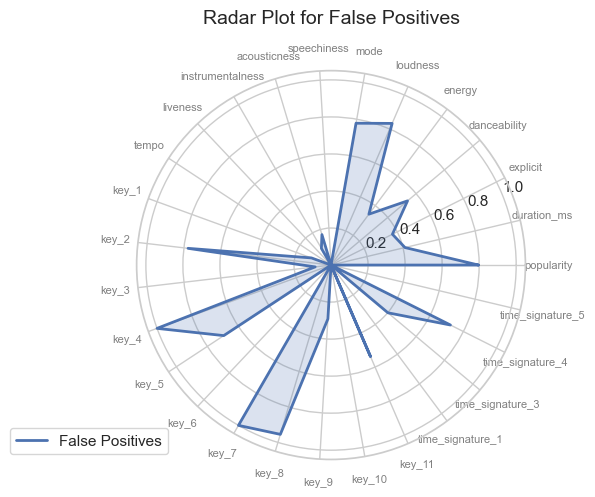

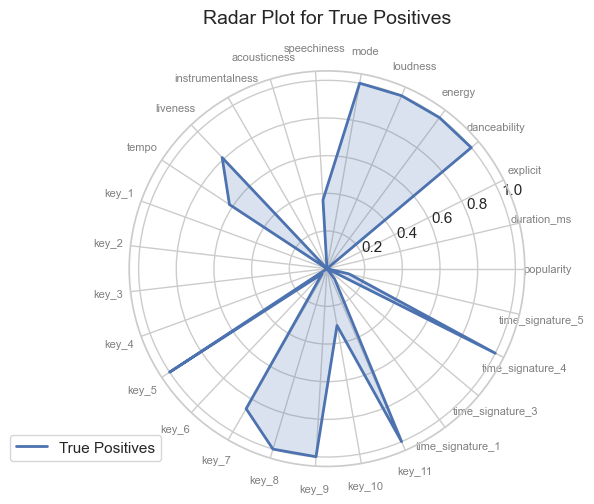

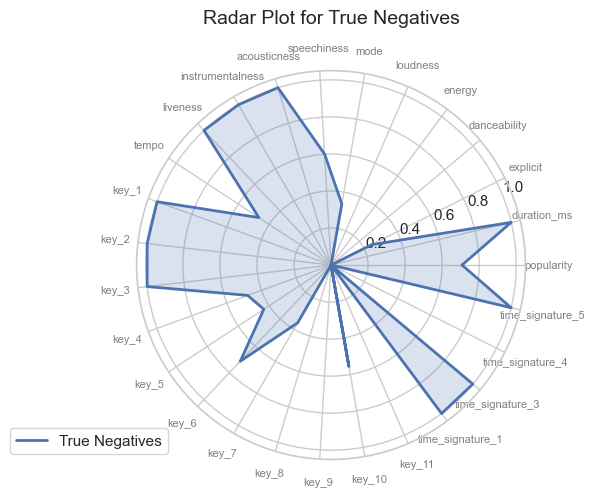

In [35]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

df_no_genres = df.loc[:, ~df.columns.str.contains("track_genre")]

# Features only (adjust as needed)
feature_cols = [
    col
    for col in df_no_genres.columns
    if col
    not in [
        "target_actual",
        "target_pred",
        "track_id",
        "artists",
        "album_name",
        "track_name",
        "valence",
    ]
]

print(feature_cols)

# Mean summary per category
summary_df = pd.DataFrame(
    {
        "False Negatives": false_negatives[feature_cols].mean(),
        "False Positives": false_positives[feature_cols].mean(),
        "True Positives": true_positives[feature_cols].mean(),
        "True Negatives": true_negatives[feature_cols].mean(),
        # "All Data": df[feature_cols].mean(),
    }
)

# Transpose for easier plotting
summary_df = summary_df.T

# Optional: Normalize columns for radar/spider-style plots
summary_norm = (summary_df - summary_df.min()) / (summary_df.max() - summary_df.min())

# --- Plot 1: Heatmap of Means per Outcome Type ---
plt.figure(figsize=(12, 6))
sns.heatmap(summary_df.T, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Feature Means by Prediction Outcome")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Plot 2: Comparison Bar Plot for One Feature at a Time ---
# Choose top 5 most differing features (by std deviation across groups)
top_diff_features = summary_df.std().sort_values(ascending=False).head(5).index

for feature in top_diff_features:
    summary_df[feature].plot(
        kind="bar", title=f"{feature} across Prediction Groups", ylabel="Mean Value"
    )
    plt.xticks(rotation=45)
    plt.grid(axis="y")
    plt.tight_layout()
    plt.show()

# --- Plot 3: Radar Plot  ---
try:
    from math import pi

    categories = list(summary_norm.columns)
    groups = summary_norm.index

    for group in groups:
        values = summary_norm.loc[group].tolist()
        values += values[:1]  # repeat the first value to close the circle

        angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
        angles += angles[:1]

        plt.figure(figsize=(6, 6))
        ax = plt.subplot(111, polar=True)
        plt.xticks(angles[:-1], categories, color="grey", size=8)

        ax.plot(angles, values, linewidth=2, linestyle="solid", label=group)
        ax.fill(angles, values, alpha=0.2)

        plt.title(f"Radar Plot for {group}", size=14, y=1.1)
        plt.legend(loc="upper right", bbox_to_anchor=(0.1, 0.1))
        plt.tight_layout()
        plt.show()
except ImportError:
    print("Radar plot skipped (requires polar plotting support).")

C:\Users\brand\AppData\Local\Temp\ipykernel_28124\3484092538.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


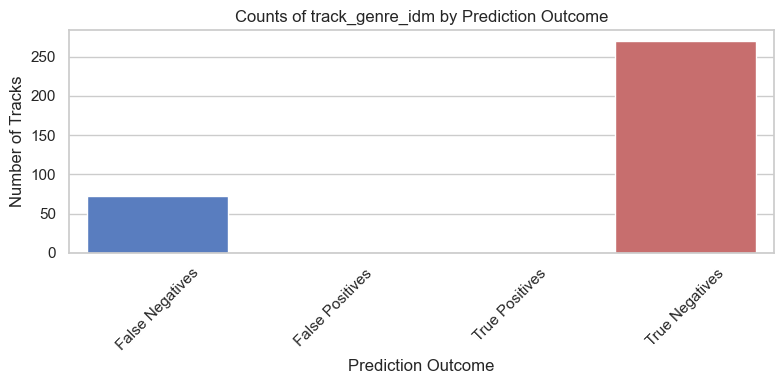

C:\Users\brand\AppData\Local\Temp\ipykernel_28124\3484092538.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


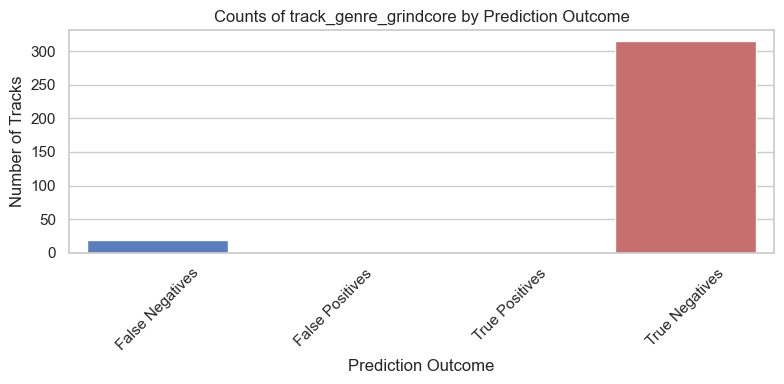

C:\Users\brand\AppData\Local\Temp\ipykernel_28124\3484092538.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


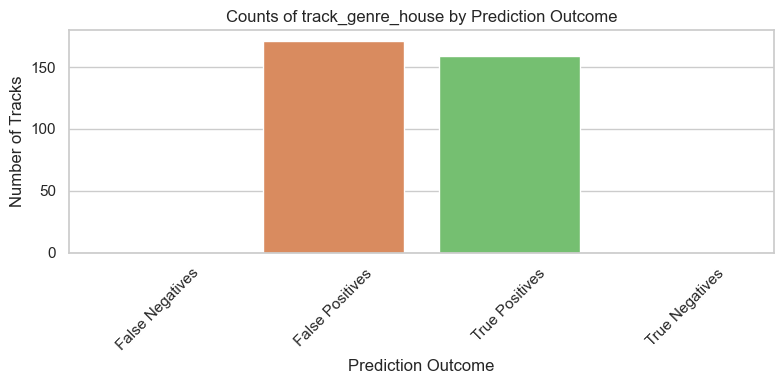

C:\Users\brand\AppData\Local\Temp\ipykernel_28124\3484092538.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


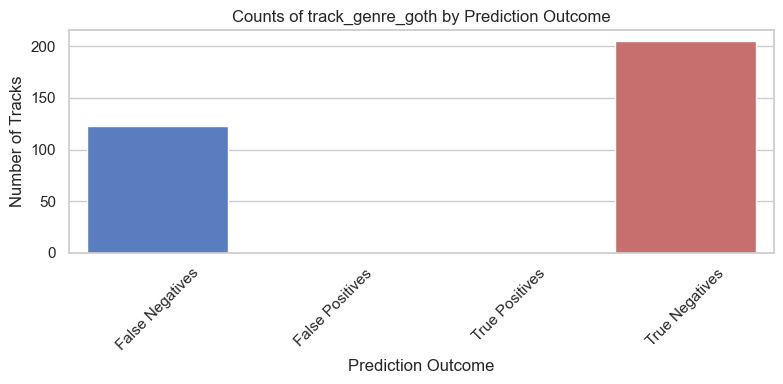

C:\Users\brand\AppData\Local\Temp\ipykernel_28124\3484092538.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


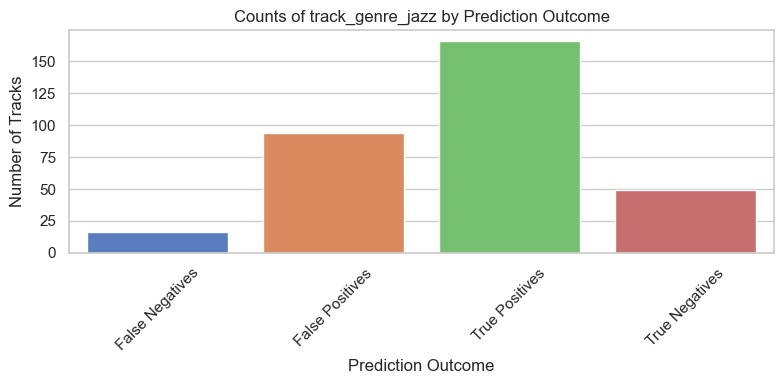

C:\Users\brand\AppData\Local\Temp\ipykernel_28124\3484092538.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


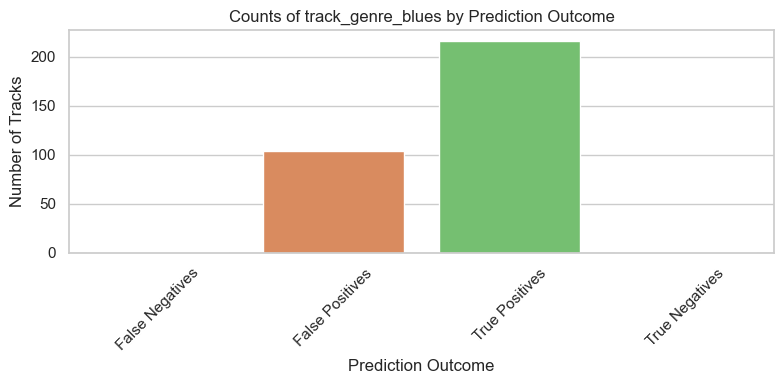

C:\Users\brand\AppData\Local\Temp\ipykernel_28124\3484092538.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


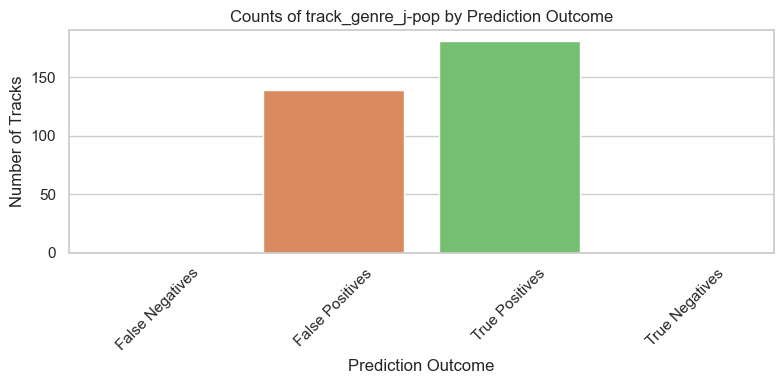

C:\Users\brand\AppData\Local\Temp\ipykernel_28124\3484092538.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


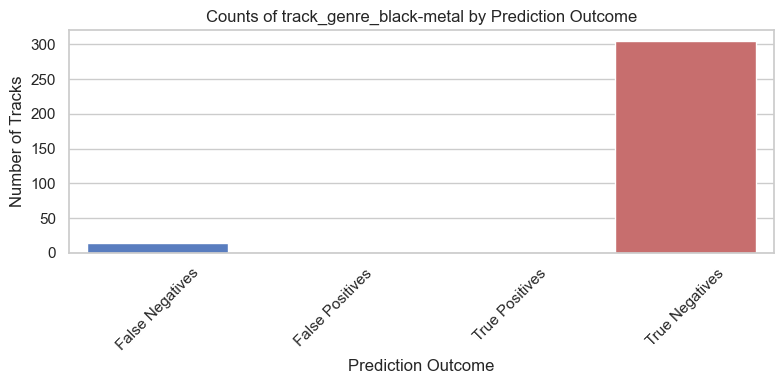

C:\Users\brand\AppData\Local\Temp\ipykernel_28124\3484092538.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


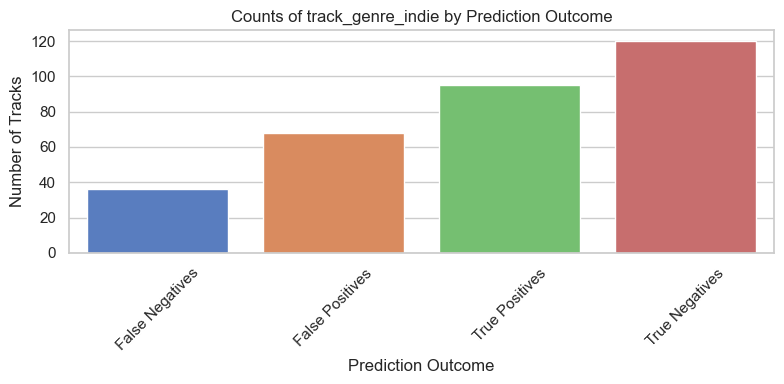

C:\Users\brand\AppData\Local\Temp\ipykernel_28124\3484092538.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


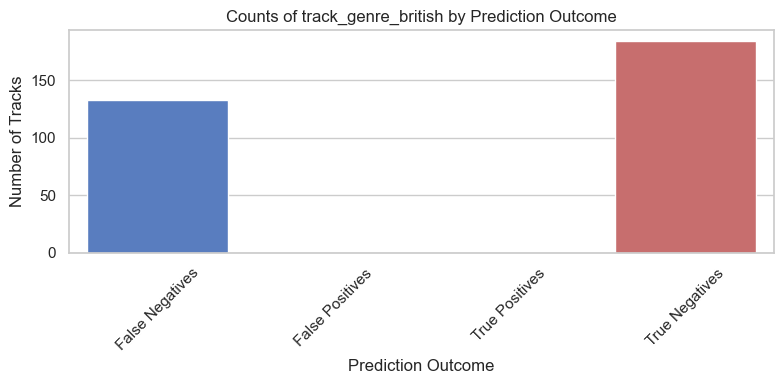

C:\Users\brand\AppData\Local\Temp\ipykernel_28124\3484092538.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


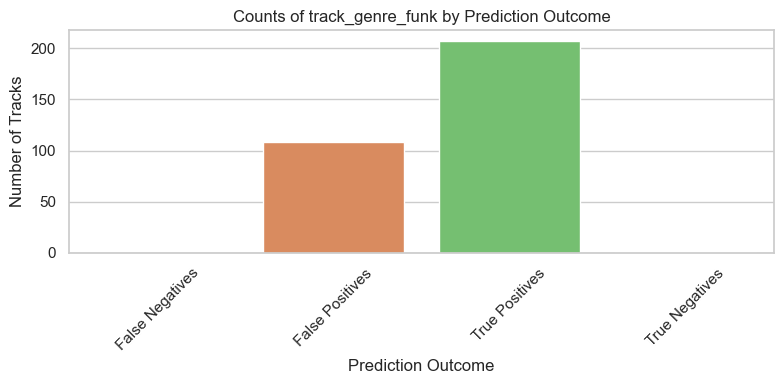

C:\Users\brand\AppData\Local\Temp\ipykernel_28124\3484092538.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


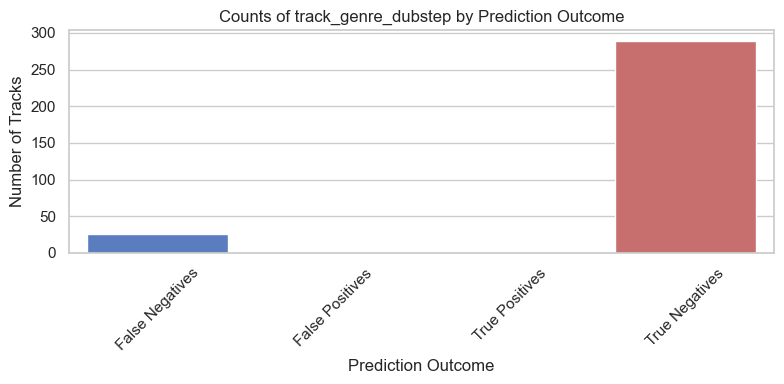

C:\Users\brand\AppData\Local\Temp\ipykernel_28124\3484092538.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


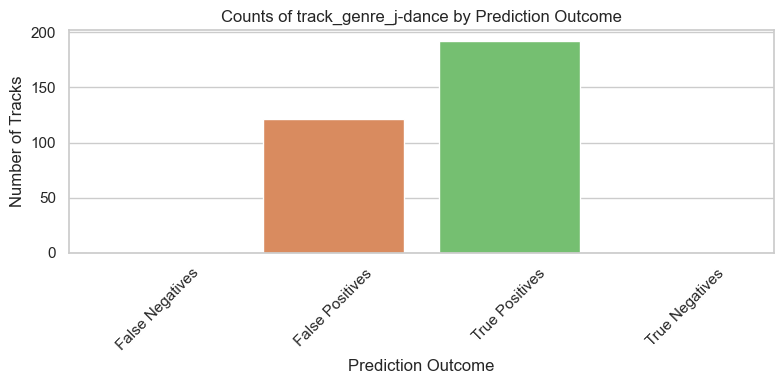

C:\Users\brand\AppData\Local\Temp\ipykernel_28124\3484092538.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


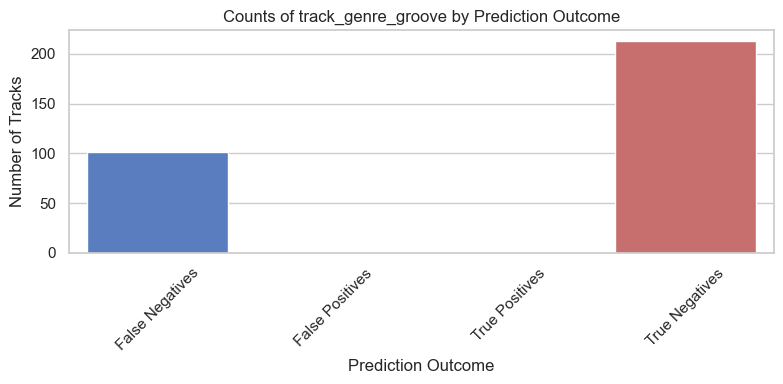

C:\Users\brand\AppData\Local\Temp\ipykernel_28124\3484092538.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


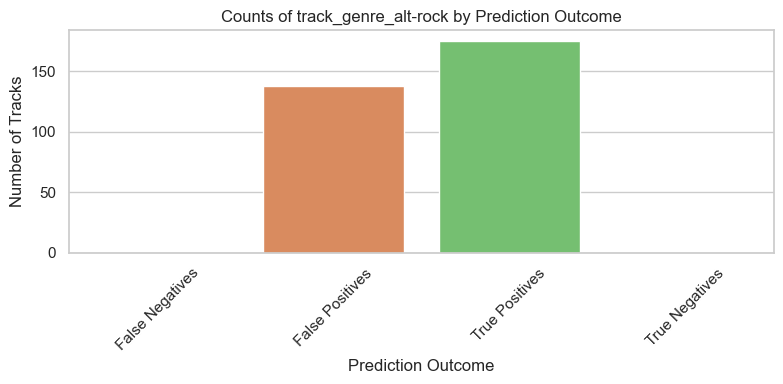

C:\Users\brand\AppData\Local\Temp\ipykernel_28124\3484092538.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


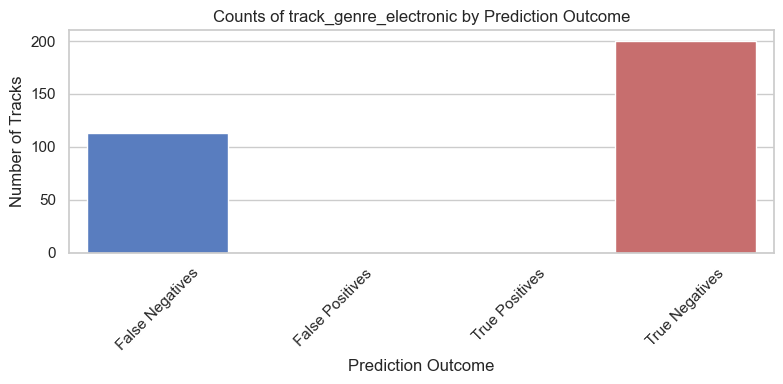

C:\Users\brand\AppData\Local\Temp\ipykernel_28124\3484092538.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


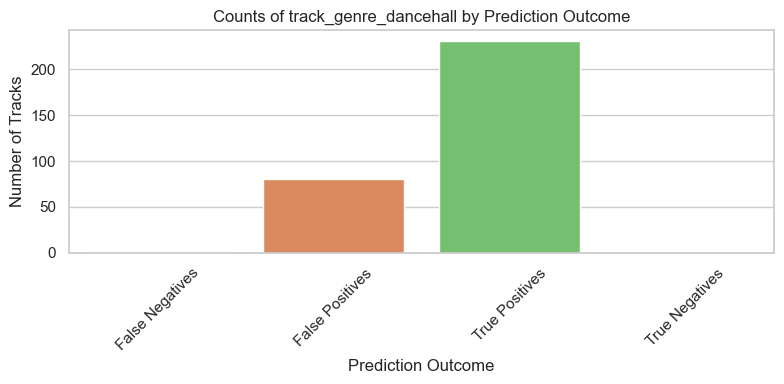

C:\Users\brand\AppData\Local\Temp\ipykernel_28124\3484092538.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


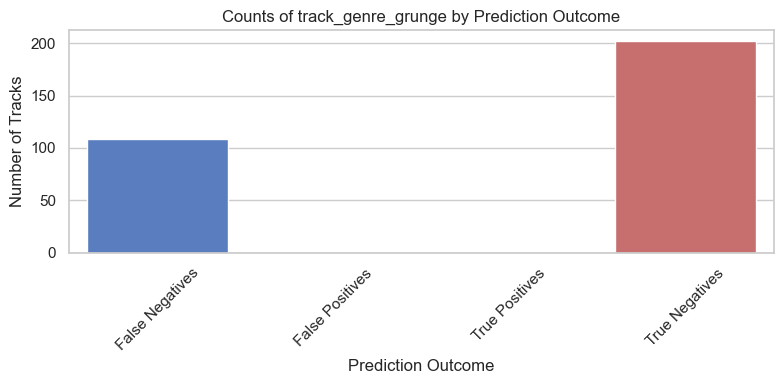

C:\Users\brand\AppData\Local\Temp\ipykernel_28124\3484092538.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


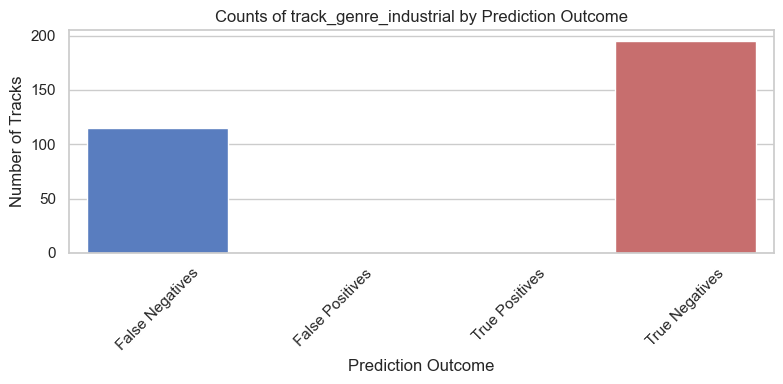

C:\Users\brand\AppData\Local\Temp\ipykernel_28124\3484092538.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


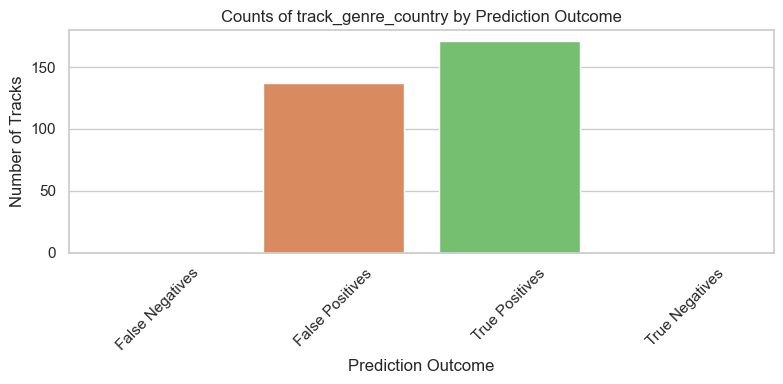

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: prettier style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

# --- Genre Counts per Prediction Outcome ---

# Ensure genre columns are all 0 or 1
genre_cols = [col for col in df.columns if col.startswith("track_genre")]

# If genre values are probabilities or standardized, convert to binary
for col in genre_cols:
    df[col] = (df[col] > 0.5).astype(int)  # Adjust threshold if needed
    # df[col].apply(pd.Series.unique)

# Define the prediction outcome groups
groups = {
    "False Negatives": false_negatives,
    "False Positives": false_positives,
    "True Positives": true_positives,
    "True Negatives": true_negatives,
}

# Count genres per group
genre_counts = {
    # group_name: group_df[genre_cols].clip(lower=0).sum() for group_name, group_df in groups.items()
    group_name: (group_df[genre_cols] > 0).astype(int).sum()
    for group_name, group_df in groups.items()
}

# genre_matrix = (df[genre_cols] != -0.09407250308929431).astype(int)
# print(genre_matrix)

# Create a DataFrame
genre_counts_df = pd.DataFrame(genre_counts).T  # Outcomes as rows
# genre_counts_df.to_csv('output.csv', index=False)

top_genres = genre_counts_df.sum(axis=0).sort_values(ascending=False).head(20).index

# Plot barplot for each genre
# for genre in genre_counts_df.columns:
for genre in top_genres:
    plt.figure(figsize=(8, 4))
    sns.barplot(
        x=genre_counts_df.index,
        y=genre_counts_df[genre].values,
        palette="muted",
    )
    plt.title(f"Counts of {genre} by Prediction Outcome")
    plt.ylabel("Number of Tracks")
    plt.xlabel("Prediction Outcome")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [37]:
# # Optional: for nicer plot styles
# sns.set(style="whitegrid")
# plt.rcParams["figure.figsize"] = (10, 5)

# # df_no_genres = df.loc[:, ~df.columns.str.contains("track_genre")]

# # Features only (adjust as needed)
# feature_cols = [
#     col
#     for col in df.columns
#     if col
#     not in [
#         "target_actual",
#         "target_pred",
#         "track_id",
#         "artists",
#         "album_name",
#         "track_name",
#         "valence",
#     ]
# ]

# print(feature_cols)

# # Mean summary per category
# summary_df = pd.DataFrame(
#     {
#         "False Negatives": false_negatives[feature_cols].mean(),
#         "False Positives": false_positives[feature_cols].mean(),
#         "True Positives": true_positives[feature_cols].mean(),
#         "True Negatives": true_negatives[feature_cols].mean(),
#         # "All Data": df[feature_cols].mean(),
#     }
# )

# # Transpose for easier plotting
# summary_df = summary_df.T


# # --- Comparison Bar Plot for of each genre  ---
# # Choose top 10 most differing features that are ONLY GENRES (by std deviation across groups)
# diff_features = (
#     summary_df.filter(like="track_genre")
#     .std()
#     .sort_values(ascending=False)
#     # .head(10)
#     .index
# )

# for feature in diff_features:
#     summary_df[feature].plot(
#         kind="bar", title=f"{feature} across Prediction Groups", ylabel="Mean Value"
#     )
#     plt.xticks(rotation=45)
#     plt.grid(axis="y")
#     plt.tight_layout()
#     plt.show()